## 1 - Lien vers le drive ##



In [33]:
from google.colab import drive

# autorisation avec un code
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2 - Import des librairies ##

In [34]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set_style("dark")

## 3 - Chargement de données ##


In [35]:
file_path = "/content/drive/My Drive/Supervised_proj/creditcard.csv"
credit_card_data = pd.read_csv(file_path)

## 4 - Analyse de données ##


In [36]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
credit_card_data.shape

(284807, 31)

In [38]:
# Les valeurs manquantes
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

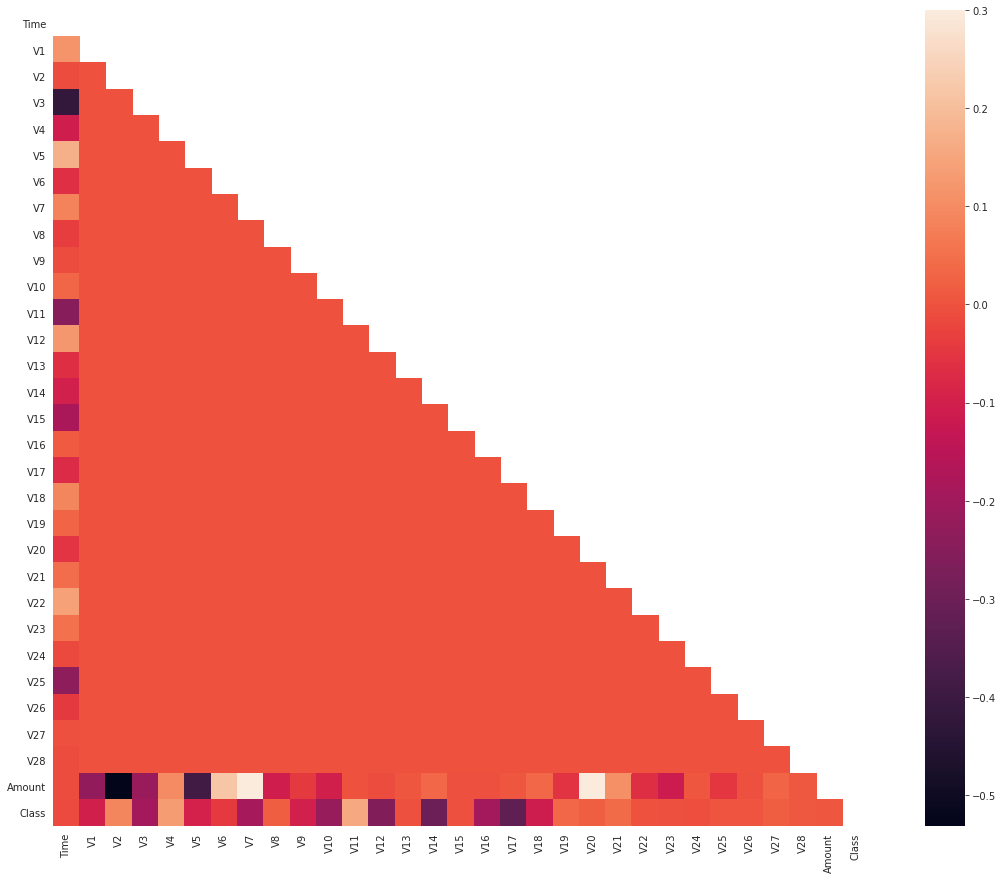

In [39]:
# Etude des corrélations
# Normalement les variables sont décorrélées (Les variables V1...V28 sont les composantes principales obtenues avec PCA) 
corr = credit_card_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     f, ax = plt.subplots(figsize=(20, 15))
     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

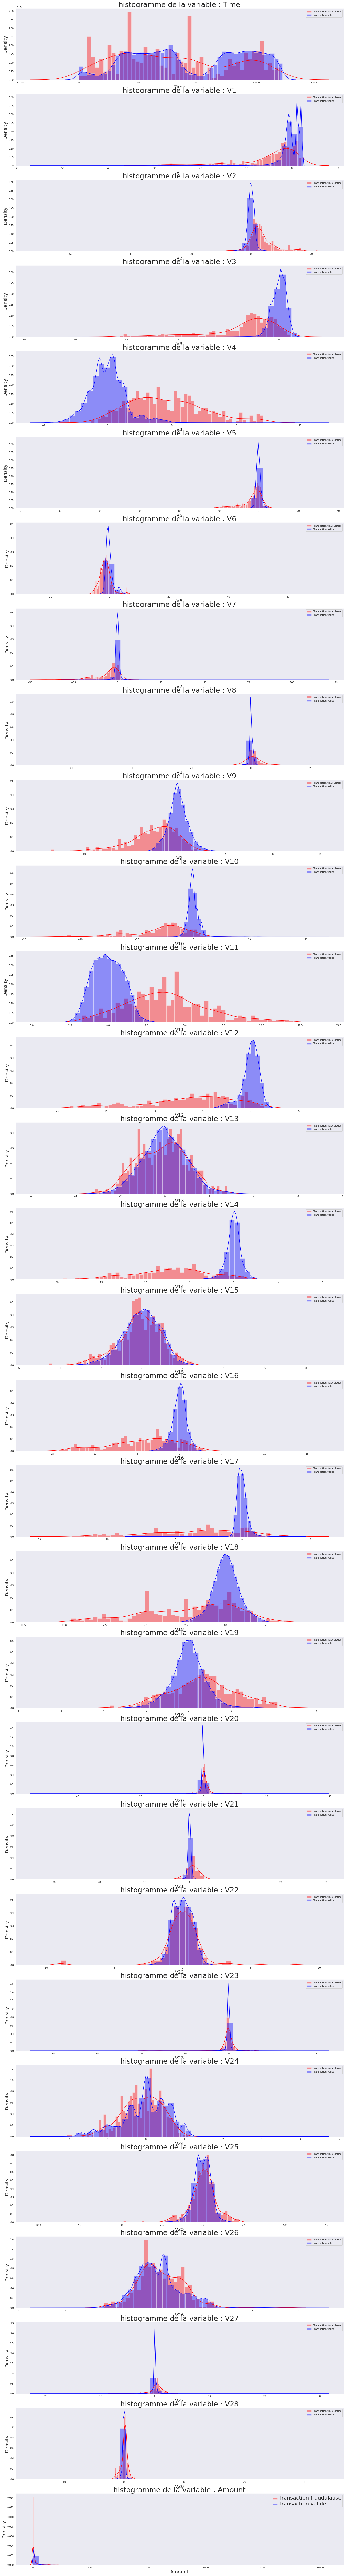

In [40]:
features = credit_card_data.iloc[:,:-1].columns
plt.figure(figsize=(25, 50*4))
gs = gridspec.GridSpec(30, 1)
for index, col in enumerate(credit_card_data[features]):
      ax = plt.subplot(gs[index])
      sns.distplot(credit_card_data[col][credit_card_data.Class == 1], 
                   bins=50, color="red", label='Transaction fraudulause')
      sns.distplot(credit_card_data[col][credit_card_data.Class == 0], 
                   bins=50, color="blue", label = "Transaction valide")
      ax.set_xlabel(f"{col}",fontsize=20)
      ax.set_ylabel("Density",fontsize=20)
      ax.set_title(f"histogramme de la variable : {col}", fontsize=30)
      ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.show()

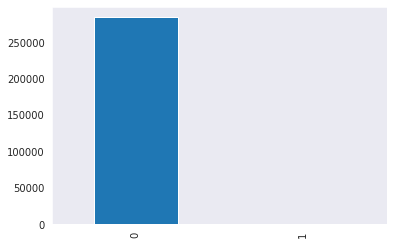

In [41]:
credit_card_data.Class.value_counts().plot(kind="bar")

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]), <a list of 9 Text major ticklabel objects>)

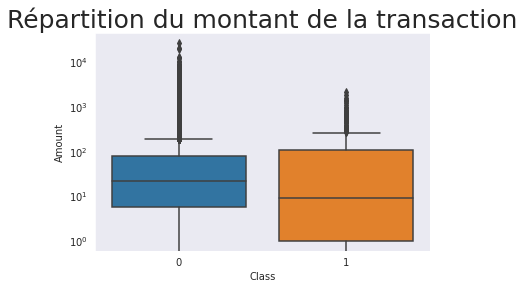

In [42]:
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (8, 5)})
g = sns.boxplot(data = credit_card_data, x = 'Class', y = 'Amount')
plt.title("Répartition du montant de la transaction", fontsize=25)
plt.xlabel('Class', fontsize=10); plt.xticks(fontsize=10)
plt.ylabel('Amount', fontsize=10); plt.yticks(fontsize=10)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]), <a list of 11 Text major ticklabel objects>)

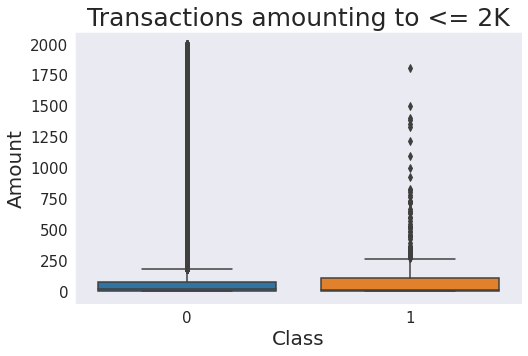

In [43]:
# Transactions less than 2K
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data=credit_card_data.loc[credit_card_data.Amount <= 2000,:], x = 'Class', y = 'Amount')
plt.title("Transactions amounting to <= 2K", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

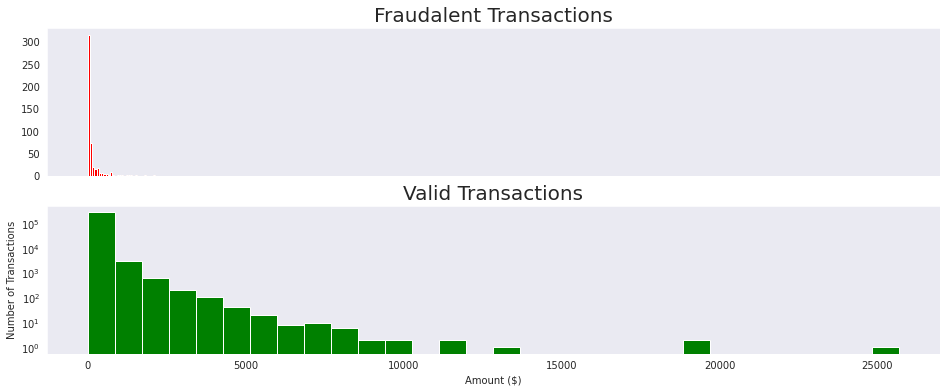

In [44]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
ax1.hist(credit_card_data.Amount[credit_card_data.Class == 1], bins = 30, color='red')
ax1.set_title('Fraudalent Transactions', fontsize=20)
ax2.hist(credit_card_data.Amount[credit_card_data.Class == 0], bins = 30, color='green')
ax2.set_title('Valid Transactions', fontsize=20)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [45]:
def convert_time(sec):
    """
    Une fonction qui permet de converter une timestamp (data en seconds) vers une date sous le format YYYY-M-D HH:MM:SS
    """
    time_convert = datetime.datetime.fromtimestamp(sec)

    return time_convert

cc_fraud_time = credit_card_data[['Time','Amount','Class']].copy()
cc_fraud_time['time'] = cc_fraud_time.Time.apply(convert_time)
timeDelta = datetime.datetime.utcnow() - datetime.datetime.now() 
cc_fraud_time['hour'] = cc_fraud_time.time + timeDelta
cc_fraud_time['hour'] = cc_fraud_time.hour.dt.hour
cc_fraud_time_grouped = cc_fraud_time.groupby(['hour','Class'])

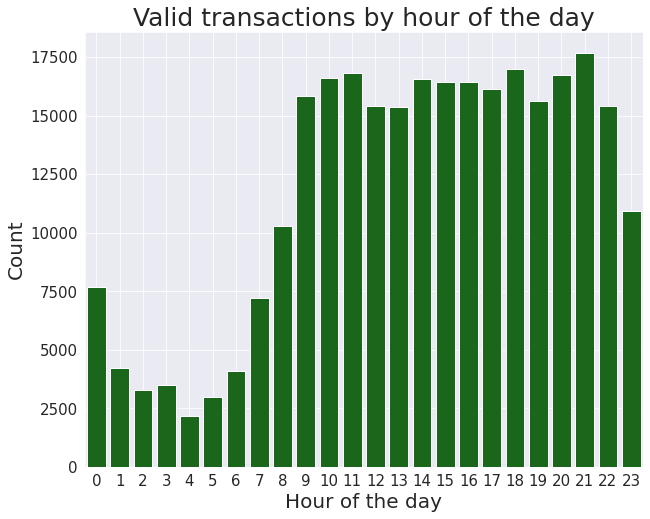

In [46]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = cc_fraud_time[cc_fraud_time.Class == 0], x = 'hour', color = 'green',
                 saturation = 0.6)
plt.title("Valid transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day', fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
g.axes.grid('off')

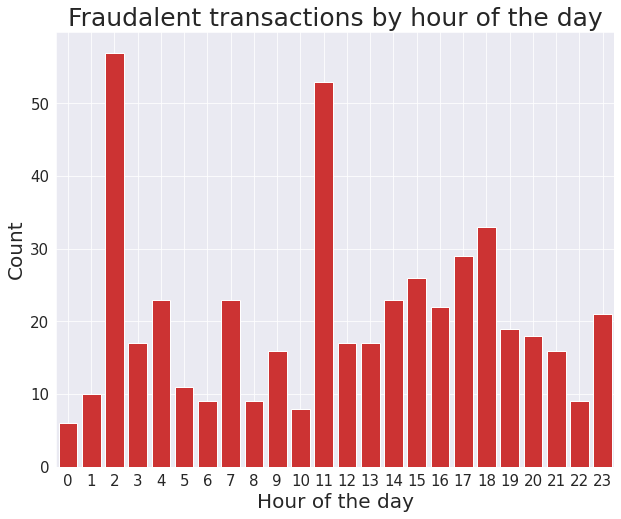

In [47]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = cc_fraud_time[cc_fraud_time.Class == 1], x = 'hour', color = 'red',
                 saturation = 0.6)
plt.title("Fraudalent transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day',fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
plt.ylabel('Count')
g.axes.grid('off')